In [125]:
import svm
import sklearn

data_dir = "/home/gz/workspace/results-babybel/"
config = ["L3-SMT"]
uncore = "shared"
tests = ["NBODY"]
X, Y, _, X_test, Y_test = svm.row_training_and_test_set(data_dir, config, tests, cutoff=1.15, uncore=uncore)

In [3]:
count = 0
for col in X:
    if X[col].sum() == 0:
        count += 1
        
print("Zero values", count)

Zero values 1577


R =  0.374306106265
Ry =  0.361102696153
Rn =  0.464730290456


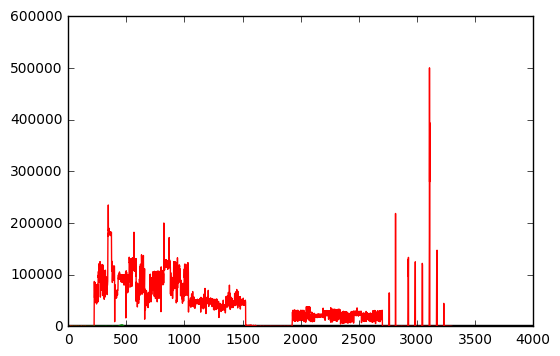

In [152]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

yes = X[Y==True]
no  = X[Y==False]
yes = yes.reset_index()
no = no.reset_index()

#plt.ylim(-1, 1)
event = "AVG.DSB_FILL.EXCEED_DSB_LINES"
plt.plot(yes[event], color='red')
plt.plot(no[event], color='green')

yes_event = yes[event]
no_event = no[event]

miny = yes_event.min()
maxy = yes_event.max()
minn = no_event.min()
maxn = no_event.max()

min_both = max(miny, minn)
max_both = min(maxy, maxn)
if max_both < min_both:
    print("No intersection!")

plt.hlines(max_both, 0, 4000)
plt.hlines(min_both, 0, 4000)

county = yes_event[yes_event >= min_both][yes_event <= max_both].count()
countn = no_event[yes_event >= min_both][yes_event <= max_both].count()

total_yes_no = yes_event.count() + no_event.count()

print ("R = ", (county+countn) / total_yes_no)
print ("Ry = ", county / yes_event.count())
print ("Rn = ", countn / no_event.count())

R =  0.779461279461
Ry =  0.8
Rn =  0.744292237443


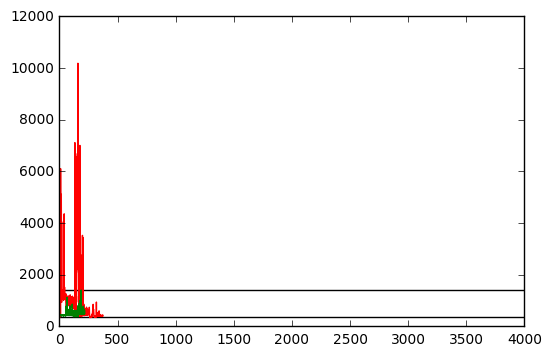

In [153]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

yes = X_test[Y_test==True]
no  = X_test[Y_test==False]

yes = yes.reset_index()
no = no.reset_index()

#plt.ylim(-1, 1)
plt.plot(yes[event], color='red')
plt.plot(no[event], color='green')

yes_event = yes[event]
no_event = no[event]

miny = yes_event.min()
maxy = yes_event.max()
minn = no_event.min()
maxn = no_event.max()

min_both = max(miny, minn)
max_both = min(maxy, maxn)
if max_both < min_both:
    print("No intersection!")

plt.hlines(max_both, 0, 4000)
plt.hlines(min_both, 0, 4000)

county = yes_event[yes_event >= min_both][yes_event <= max_both].count()
countn = no_event[yes_event >= min_both][yes_event <= max_both].count()

total_yes_no = yes_event.count() + no_event.count()

print ("R = ", (county+countn) / total_yes_no)
print ("Ry = ", county / yes_event.count())
print ("Rn = ", countn / no_event.count())